Embedding 1: [0.0, 0.0, 0.0, 0.0, 0.0]
Embedding 2: [0.0, 0.0, 0.0, 0.0, 0.0]
Overall Similarity: 44.03%
Classification: Dissimilar (<75%)


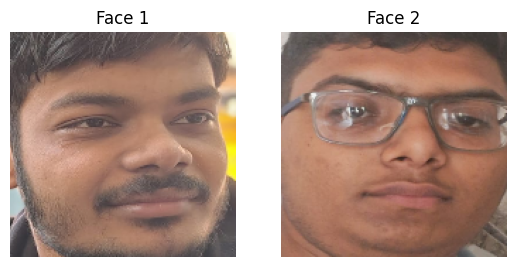

In [2]:
# 1 practical
import cv2
import numpy as np
from deepface import DeepFace
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# Step 1: Face Detection and Alignment
detector = MTCNN()

def detect_and_align_face(image_path):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(image)
    if not faces:
        raise ValueError("No face detected in the image.")
    
    # Extract the first face
    x, y, w, h = faces[0]['box']
    face = image[y:y+h, x:x+w]
    
    # Resize and normalize the face
    face = cv2.resize(face, (160, 160))  # Resize to match model input size
    face = face.astype('float32') / 255.0  # Normalize pixel values
    return face

# Step 2: Feature Extraction
def extract_features(face):
    # Use VGG-Face for feature extraction
    result = DeepFace.represent(face, model_name='VGG-Face', enforce_detection=False)
    embedding = result[0]['embedding']
    return embedding

# Step 3: Similarity Calculation
def compute_similarity(embedding1, embedding2):
    # Compute cosine similarity
    similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
    return similarity

# Step 4: Classification
def classify_similarity(similarity):
    if similarity >= 0.90:
        return "Highly Similar (90%+)"
    elif similarity >= 0.75:
        return "Moderately Similar (75%-90%)"
    else:
        return "Dissimilar (<75%)"

# Step 5: Visualization
def visualize_faces(face1, face2):
    plt.subplot(1, 2, 1)
    plt.imshow(face1)
    plt.title("Face 1")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(face2)
    plt.title("Face 2")
    plt.axis('off')
    
    plt.show()

# Main Function
def compare_faces(image1_path, image2_path):
    try:
        # Detect and align faces
        face1 = detect_and_align_face(image1_path)
        face2 = detect_and_align_face(image2_path)
        
        # Extract facial embeddings
        embedding1 = extract_features(face1)
        embedding2 = extract_features(face2)
        
        # Debug: Print embeddings
        print("Embedding 1:", embedding1[:5])  # Print first 5 values
        print("Embedding 2:", embedding2[:5])  # Print first 5 values
        
        # Compute similarity
        similarity = compute_similarity(embedding1, embedding2)
        classification = classify_similarity(similarity)
        
        # Print results
        print(f"Overall Similarity: {similarity * 100:.2f}%")
        print(f"Classification: {classification}")
        
        # Visualize faces
        visualize_faces(face1, face2)
    
    except Exception as e:
        print(f"Error: {e}")

# Example Usage
compare_faces("C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg", "C:\\Users\\Nikhil Darji\\Downloads\\nik.jpg")

Embedding 1: [0.0, 0.0, 0.0, 0.0, 0.0]
Embedding 2: [0.0, 0.0, 0.0, 0.0, 0.0]
Overall Similarity: 77.74%
Classification: Moderately Similar (75%-90%)


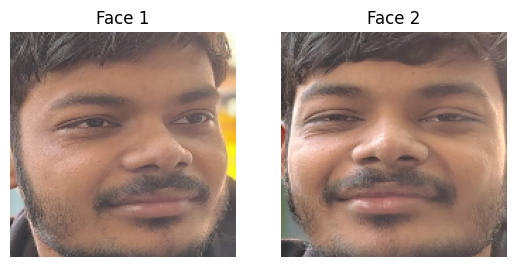

In [3]:
compare_faces("C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg", "C:\\Users\\Nikhil Darji\\Downloads\\rahul2.jpg")

Embedding 1: [0.0, 0.0, 0.0, 0.0, 0.0]
Embedding 2: [0.0, 0.0, 0.0, 0.0, 0.0]
Overall Similarity: 73.92%
Classification: Dissimilar (<75%)


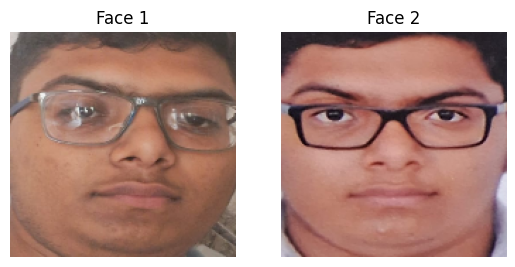

In [4]:
compare_faces("C:\\Users\\Nikhil Darji\\Downloads\\nik.jpg", "C:\\Users\\Nikhil Darji\\Downloads\\nikkk.jpg")



🔍 Checking with Facenet512...

Model: Facenet512
Similarity Score: 92.19%
Threshold: 0.30
Classification: Highly Similar (90%+)
✅ High match found, stopping further checks.


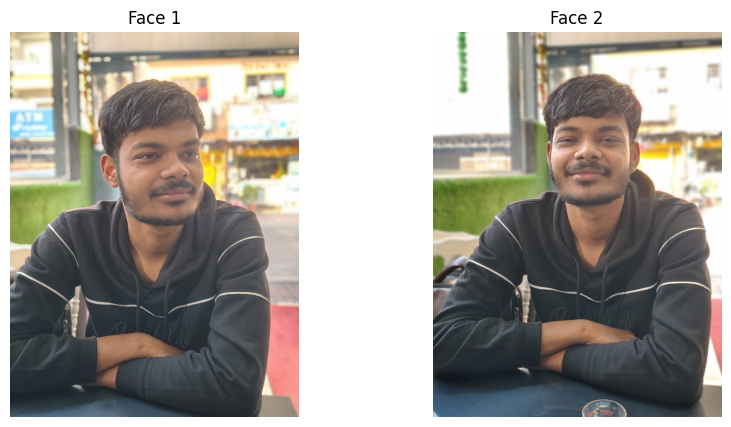

In [ ]:
# Practical 2
import cv2
import numpy as np
from deepface import DeepFace
import matplotlib.pyplot as plt

# Compare two faces using multiple models
def compare_faces(image1_path, image2_path):
    # List of models to try
    models = ["Facenet512"]
    
    for model in models:
        try:
            print(f"\n🔍 Checking with {model}...\n")
            
            # Verify faces using the current model
            result = DeepFace.verify(image1_path, image2_path, model_name=model, enforce_detection=True)

            # Extract similarity score
            distance = result["distance"]
            threshold = result["threshold"]  # Model-specific threshold
            similarity = 100 - (distance * 100)  # Convert to percentage

            # Classification
            classification = classify_similarity(similarity)

            # Print results
            print(f"Model: {model}")
            print(f"Similarity Score: {similarity:.2f}%")
            print(f"Threshold: {threshold:.2f}")
            print(f"Classification: {classification}")

            # If similarity is already 90%+, stop checking
            if similarity >= 90:
                print("✅ High match found, stopping further checks.")
                break

        except Exception as e:
            print(f"Error using {model}: {e}")

    # Display images
    visualize_faces(image1_path, image2_path)

# Classify similarity
def classify_similarity(similarity):
    if similarity >= 90:
        return "Highly Similar (90%+)"
    elif similarity >= 75:
        return "Moderately Similar (75%-90%)"
    else:
        return "Dissimilar (<75%)"

# Display images
def visualize_faces(image1_path, image2_path):
    # Load images
    img1 = cv2.cvtColor(cv2.imread(image1_path), cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(cv2.imread(image2_path), cv2.COLOR_BGR2RGB)

    # Check if images were loaded successfully
    if img1 is None or img2 is None:
        print("Error: One or both images could not be loaded. Please check the file paths.")
        return

    # Plot images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title("Face 1")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title("Face 2")
    plt.axis('off')

    plt.show()

# Example Usage
if __name__ == "__main__":
    image1 = "C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg"
    image2 = "C:\\Users\\Nikhil Darji\\Downloads\\rahul2.jpg"
    compare_faces(image1, image2)


🔍 Checking with Facenet512...

Model: Facenet512
Similarity Score: 44.60%
Threshold: 0.30
Classification: Dissimilar (<75%)


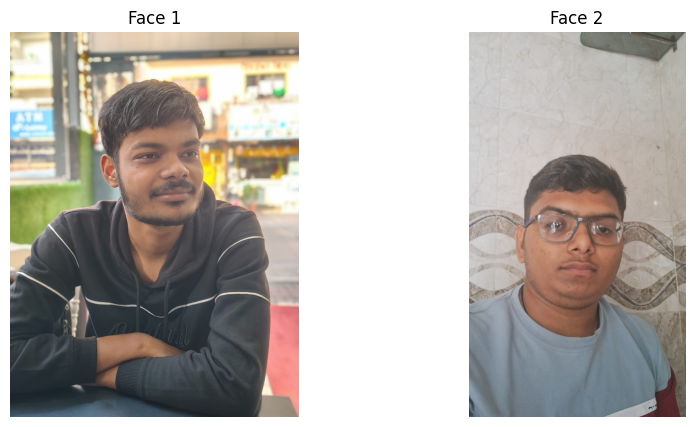

In [2]:
compare_faces("C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg", "C:\\Users\\Nikhil Darji\\Downloads\\nik.jpg")


🔍 Checking with Facenet512...

Model: Facenet512
Similarity Score: 95.00%
Threshold: 0.30
Classification: Highly Similar (90%+)
✅ High match found, stopping further checks.


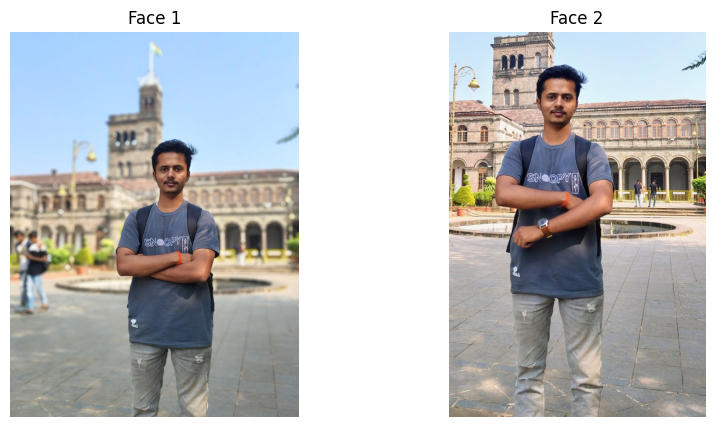

In [3]:
compare_faces("C:\\Users\\Nikhil Darji\\Downloads\\harsh.jpg", "C:\\Users\\Nikhil Darji\\Downloads\\jivan.jpg")